# Ejercicio 2 - Practica 2

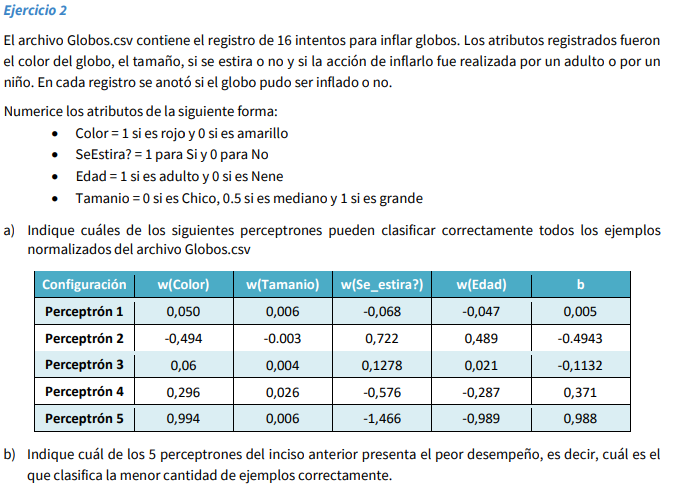

In [9]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../Fuentes'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [10]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos

nombre_archivo = DATOS_DIR + 'Globos.csv' # archivo de globos

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

# visualiza el dataframe
#print(df)
display(df)

,Color,Tamanio,Se_estira?,Edad,Inflado?
0,Amarillo,Chico,Si,Adulto,Si
1,Amarillo,Chico,Si,Niño,Si
2,Amarillo,Chico,No,Adulto,No
3,Amarillo,Chico,No,Niño,No
4,Amarillo,Grande,Si,Adulto,Si
5,Amarillo,Grande,Si,Niño,Si
6,Amarillo,Mediano,No,Adulto,No
7,Amarillo,Mediano,No,Niño,No
8,Rojo,Chico,Si,Adulto,Si
9,Rojo,Chico,Si,Niño,No


In [11]:
#Para numerizar:
#Color = 1 si es rojo y 0 si es amarillo
#SeEstira? = 1 para Si y 0 para No
#Edad = 1 si es adulto y 0 si es Nene
#Tamanio = 0 si es Chico, 0.5 si es mediano y 1 si es grande

reemplazos = {
    "Color": {"Rojo":1, "Amarillo":0},
    "Se_estira?": {"Si":1, "No":0},
    "Edad": {"Adulto": 1, "Niño":0},
    "Tamanio": {"Chico":0, "Grande":1, "Mediano":0.5}
}

df.replace(reemplazos, inplace=True)
df

C:\Users\ivanb\AppData\Local\Temp\ipykernel_13784\1675596687.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(reemplazos, inplace=True)


,Color,Tamanio,Se_estira?,Edad,Inflado?
0,0,0.0,1,1,Si
1,0,0.0,1,0,Si
2,0,0.0,0,1,No
3,0,0.0,0,0,No
4,0,1.0,1,1,Si
5,0,1.0,1,0,Si
6,0,0.5,0,1,No
7,0,0.5,0,0,No
8,1,0.0,1,1,Si
9,1,0.0,1,0,No


* Veamos cuáles de los perceptrones pueden clasificar correctamente todos los ejemplos normalizados del archivo Globos.csv

In [12]:

perceptron_1 = [0.050, 0.006, -0.068, -0.047, 0.005]
perceptron_2 = [-0.494, -0.003, 0.722, 0.489, -0.4943]
perceptron_3 = [0.06, 0.004, 0.1278, 0.021, -0.1132]
perceptron_4 = [0.296, 0.026, -0.576, -0.287, 0.371]
perceptron_5 = [0.994, 0.006, -1.466, -0.989, 0.988]
per_c = [0.296, 0.026, -0.576, -0.287, 0.371]

def probar_Perceptron (df, Perceptron):
    clasificaBien = True
    cant=0
    for fila in range (len(df)):
        datos_fila = df.iloc[fila]
        y_real = datos_fila[-1]
        
        #calculo la salida del perceptron
        y = (datos_fila['Color'] * Perceptron[0]) + (datos_fila['Tamanio'] * Perceptron[1]) + (datos_fila['Se_estira?'] * Perceptron[2]) + (datos_fila['Edad'] * Perceptron[3])  + Perceptron[4]

        #calculo la salida
        salida = 1 if y>=0 else 0

        etiqueta_real = 1 if y_real == 'Si' else 0
        if salida != etiqueta_real:
            clasificaBien = False
            cant=cant+1 #cuento la cantidad de veces que se equivoca
            break
        
    return clasificaBien,cant

res1,cant1 = probar_Perceptron(df, perceptron_1)
res2,cant2 = probar_Perceptron(df, perceptron_2)
res3,cant3 = probar_Perceptron(df, perceptron_3)
res4,cant4 = probar_Perceptron(df, perceptron_4)
res5,cant5 = probar_Perceptron(df, perceptron_5)

c,cantc = probar_Perceptron(df, per_c)

print("El perceptron 1 " + ("clasifica correctamente todos los ejemplos normalizados" if res1 else f"se equivoca {cant1} veces"))
print("El perceptron 2 " + ("clasifica correctamente todos los ejemplos normalizados" if res2 else f"se equivoca {cant2} veces"))
print("El perceptron 3 " + ("clasifica correctamente todos los ejemplos normalizados" if res3 else f"se equivoca {cant3} veces"))
print("El perceptron 4 " + ("clasifica correctamente todos los ejemplos normalizados" if res4 else f"se equivoca {cant4} veces"))
print("El perceptron 5 " + ("clasifica correctamente todos los ejemplos normalizados" if res5 else f"se equivoca {cant5} veces"))

print("El perceptron C " + ("clasifica correctamente todos los ejemplos normalizados" if c else f"se equivoca {cantc} veces"))

El perceptron 1 se equivoca 1 veces
El perceptron 2 clasifica correctamente todos los ejemplos normalizados
El perceptron 3 se equivoca 1 veces
El perceptron 4 se equivoca 1 veces
El perceptron 5 se equivoca 1 veces
El perceptron C se equivoca 1 veces


C:\Users\ivanb\AppData\Local\Temp\ipykernel_13784\3909673133.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_real = datos_fila[-1]
